In [1]:
%matplotlib inline
import os
import json
import matplotlib.pyplot as plt

from statistics import mean

In [2]:
results_dir = "../results"
blockdevices = os.environ["BLOCKDEVICES"].split(" ")
modes = os.environ["MODES"].split(" ")
iodepths = os.environ["IO_DEPTH"].split(" ")

In [3]:
def get_mean(lst):
    return "%.2f" % mean(lst)

# Bandwidth Plots

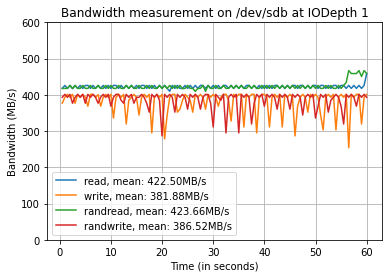

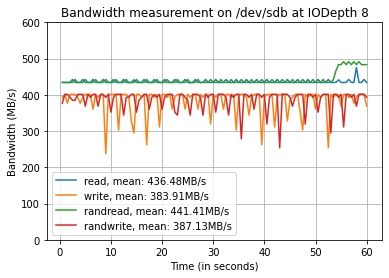

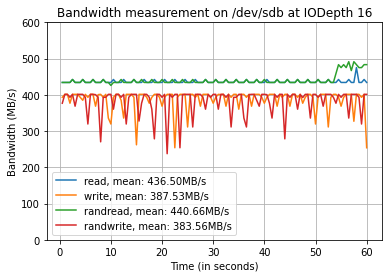

In [4]:
for iodepth in iodepths:
    for blkdev in blockdevices:
        base_dir = os.path.join(f"../results/FIO_OUTPUT/{blkdev}/{os.environ['BLOCKSIZE']}")
        for mode in modes:
            with open(os.path.join(base_dir, f"{mode}-iodepth-{iodepth}-numjobs-{os.environ['NUM_JOBS']}_bw.1.log"), "r") as f:
                results = f.readlines()            
                time = []
                bandwidth = []

                for datapoint in results:
                    time.append(int(datapoint.split(",")[0])/1000)
                    bandwidth.append(int(datapoint.split(",")[1])/1000)
                    
                mean_bw = get_mean(bandwidth)

                plt.ylim(0, 600)
                plt.plot(time, bandwidth, markersize=10, linewidth=1.5, label=f"{mode}, mean: {mean_bw}MB/s")

        plt.xlabel("Time (in seconds)")
        plt.ylabel("Bandwidth (MB/s)")
        plt.title(f"Bandwidth measurement on /dev/{blkdev} at IODepth {iodepth}")
        plt.legend()
        plt.grid()
        plt.savefig(os.path.join(results_dir, f"./fio-bw-{blkdev}-{iodepth}.png"), dpi=300, bbox_inches='tight')
        plt.show()

# IOPS Plots

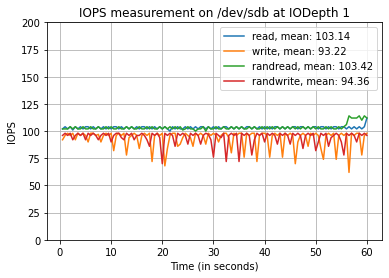

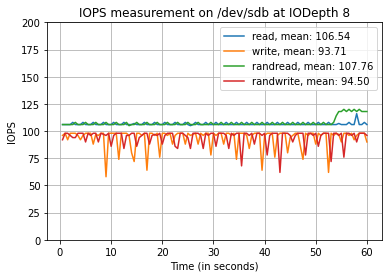

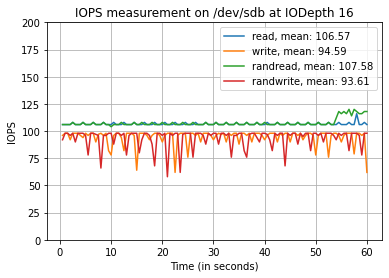

In [5]:
for iodepth in iodepths:
    for blkdev in blockdevices:
        base_dir = os.path.join(f"../results/FIO_OUTPUT/{blkdev}/{os.environ['BLOCKSIZE']}")
        i = 0
        for mode in modes:
            with open(os.path.join(base_dir, f"{mode}-iodepth-{iodepth}-numjobs-{os.environ['NUM_JOBS']}_iops.1.log"), "r") as f:
                results = f.readlines()            
                time = []
                iops = []

                for datapoint in results:
                    time.append(int(datapoint.split(",")[0])/1000)
                    iops.append(int(datapoint.split(",")[1]))
                    
                mean_iops = get_mean(iops)

                plt.ylim(0, 200)
                plt.plot(time, iops, markersize=10, linewidth=1.5, label=f"{mode}, mean: {mean_iops}")

        plt.xlabel("Time (in seconds)")
        plt.ylabel("IOPS")
        plt.title(f"IOPS measurement on /dev/{blkdev} at IODepth {iodepth}")
        plt.legend()
        plt.grid()
        plt.savefig(os.path.join(results_dir, f"./fio-iops-{blkdev}-{iodepth}.png"), dpi=300, bbox_inches='tight')
        plt.show()

# Latency Plots

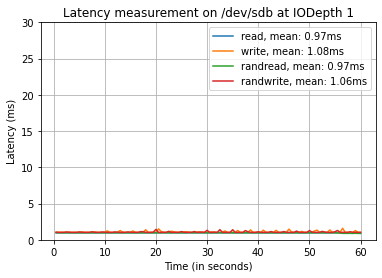

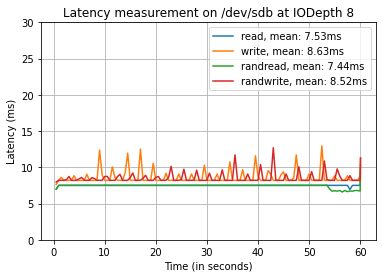

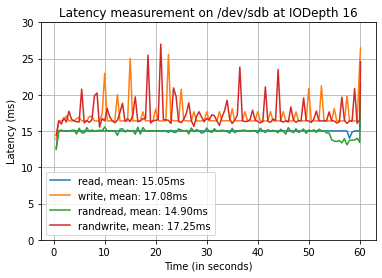

In [6]:
for iodepth in iodepths:
    for blkdev in blockdevices:
        base_dir = os.path.join(f"../results/FIO_OUTPUT/{blkdev}/{os.environ['BLOCKSIZE']}")
        for mode in modes:
            with open(os.path.join(base_dir, f"{mode}-iodepth-{iodepth}-numjobs-{os.environ['NUM_JOBS']}_lat.1.log"), "r") as f:
                results = f.readlines()            
                time = []
                lat = []

                for datapoint in results:
                    time.append(int(datapoint.split(",")[0])/1000)
                    lat.append(int(datapoint.split(",")[1])/10000000)
                    
                mean_lat = get_mean(lat)

                plt.ylim(0, 30)
                plt.plot(time, lat, markersize=10, linewidth=1.5, label=f"{mode}, mean: {mean_lat}ms")
        
        plt.xlabel("Time (in seconds)")
        plt.ylabel("Latency (ms)")
        plt.title(f"Latency measurement on /dev/{blkdev} at IODepth {iodepth}")
        plt.legend()
        plt.grid()
        plt.savefig(os.path.join(results_dir, f"./fio-lat-{blkdev}-{iodepth}.png"), dpi=300, bbox_inches='tight')
        plt.show()